In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib
!pip install PyStemmer

     |████████████████████████████████| 1.5MB 4.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 20.1 MB 1.5 MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.17.5
    Uninstalling numpy-1.17.5:
      Successfully uninstalled numpy-1.17.5


Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.3)
     |████████████████████████████████| 1.5 MB 5.1 MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449904 sha256=8b07740ab1ad903d386402e61b8d3a974cedffe2851cfc411427bdf35995ffd0
  Stored in directory: /root/.cache/pip/wheels/e3/c9/b0/ed26a73ef75a53145820825afa8e2d2c9b30fe9f6c10cd3202
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.1)
Requirement already up-to-date: joblib in /usr/local/lib/python3.6/dist-packages (0.14.1)
     |████████████████████████████████| 360 kB 4.9 MB/s 
  Created wheel for PyStemmer: filename=PyStemmer-1.3.0-cp36-cp36m-linux_x86_64.whl size=284196 sha256=1c1c60a0567b4d44659507a99dfcd291005acf27b2128e6ea9c2f4280a6ff407
  Stored in directo

## Εισαγωγή του Dataset

In [ ]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

In [ ]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 65

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1RRoiOjhD0JB3l4oHNFOmPUqZHDphIdwL"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

In [ ]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['The Hebrew Hammer']
['"Parody",  "Indie",  "Superhero movie",  "Holiday Film",  "Action/Adventure",  "Comedy",  "Action"']
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [ ]:
from sklearn.externals import joblib
import Stemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά


english_stemmer = Stemmer.Stemmer('en')
class StemmedTfidfVectorizer(TfidfVectorizer):
  def build_analyzer(self):
    analyzer = super(TfidfVectorizer, self).build_analyzer()
    return lambda doc: english_stemmer.stemWords(analyzer(doc))

#λεξεις που δεν έχουν σημασιολογικό περιεχόμενο
my_words=['film','director','plot','movie','scenes','title','actor','writer','man','woman','human','girl','boy','about', "'d", "'ll", "'m", "'re", "'the", "'ve", '–', '—', '‘', '’']
not_useful_words = list(list(string.punctuation) + my_words + stopwords.words('english'))
vectorizer = StemmedTfidfVectorizer(analyzer = 'word', stop_words = not_useful_words, max_df=0.5, min_df=0.02)
%time corpus_tf_idf = vectorizer.fit_transform(corpus).toarray()
joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


CPU times: user 2.02 s, sys: 8.65 ms, total: 2.03 s
Wall time: 2.04 s


['corpus_tf_idf.pkl']

In [ ]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

In [ ]:
print(corpus_tf_idf.shape)

(5000, 1172)


In [ ]:
import scipy as sp

def print_movie_details(ID=100):
    print("ID:",ID)
    print("Title: ",titles[ID])
    print("Summary: ",corpus[ID])
    print("Categories: ",categories[ID])

def content_recommender(target_movie, max_recommendations):
  counter = 0 # gia ta ID
  cosine_similarity = []
  for i in corpus_tf_idf:
    cosine_similarity.append((counter,(1-sp.spatial.distance.cosine(corpus_tf_idf[target_movie], i))))
    counter += 1
  
  from operator import itemgetter
  distance=sorted(cosine_similarity, key=lambda tup: tup[1],reverse=True)
  recommendations=distance[1:max_recommendations+1]# επιλέγουμε μέχρι max_recommendation ταινίες
  print("Οι ", max_recommendations, "πρώτες ταινίες με τη μεγαλύτερη ομοιότητα:\n" ,recommendations, "\n")
  recommendations=[i[0] for i in recommendations]# επιλέγουμε απο τα max_recommendation τα id των ταινιών
  print("Target Movie \n")
  print_movie_details(target_movie)
  print("\nRecommended Movies \n")
  for x in recommendations:
    print_movie_details(x)
  return recommendations

In [ ]:
recommended_movies = content_recommender(3099,6)

Οι  6 πρώτες ταινίες με τη μεγαλύτερη ομοιότητα:
 [(2363, 0.5325742449989657), (2495, 0.4528362804561539), (2286, 0.4505904997715915), (465, 0.4403957309964974), (1521, 0.4222142182516837), (3739, 0.4208307799600204)] 

Target Movie 

ID: 3099
Title:  ["Mickey's Twice Upon a Christmas"]
Summary:   This first segment tells the story of Minnie Mouse  and Daisy Duck  who are competing in an ice skating competition. The girls each are joined by their boyfriends, Mickey and Donald, as they prepare to take the ice. Minnie is announced to take the ice first for her routine, which involves a bell choir and the Fantasia Alligatorsas backup skaters. As Minnie and the Alligators perform their routine, Daisy begins to become jealous at how much the crowd enjoys the performance. She decides to ruin Minnie's routine by stealing the spotlight for herself, performing amazing jumps and tricks on the ice. Trying to regain the spotlight, Minnie performs a daredevil jump over the Alligators, turning all e

#Βελτιστοποίηση  TfidfVectorizer
---
Για να βελτιστοποιήσουμε τον *tfidfVectorizer*, τον κατατοπίζουμε στο πως να επεξεργαστεί και να χρησιμοποιήσει όλες τις λέξεις που παίρνει από τις περιγραφές των ταινιών.
 
Κατ' αρχάς υπάρχουν λέξεις οι οποίες δεν προσδίδουν κάποια πληροφορία στην πλοκή της ταινίας, όπως άρθρα, συνδετικές λέξεις, κ.α. Επειδή το το έτοιμο λεξικό "english" της συνάρτησης TfidfVectorizer δεν μας δίνει αρκετές λέξεις, χρησιμοποιούμε το δικό μας *tokenizer* για να αφαιρέσουμε τις λέξεις που θέλουμε. Αυτές συμπεριλαμβάνουν τα *english stopwords*, καθώς επίσης και διάφορες άλλες όπως director, plot, movie, κ.α. τα οποία δε δίνουν κάποια πληροφορία για την πλοκή της ταινίας. Στη συνέχεια αφαιρέσαμε κάποια σύμβολα (παρενθέσεις, ερωτηματικα, κα) τα οποία τα εξελάμβανε σαν ξεχωριστές λέξεις ο TfidfVectorizer.

Έπειτα, για τις λέξεις που έμειναν, επειδή πολλές από αυτές είναι παράγωγα η μια της άλλης και άρα έχουν κοινή ρίζα, χρησιμοποιήσαμε 2 τεχνικές για να μειώσουμε τον αριθμό των λέξεων βάση της ρίζας τους, και να κάνουμε πιο εύκολη και πιο αποδοτική την ανάλυση των πλοών των ταινιών. Η μία τεχνική είναι η *lemmatization*, η οποία αναφέρεται στην απομάκρυνση της κλίσης των λέξεων. Η δεύτερη τεχνική είναι η *stemming*, η οποία αναφέρεται στη αφαίρεση της κατάληξης της λέξης. Πειραματιστήκαμε και με τις 2 αυτές τεχνικές, και επιλέξαμε αυτή με την καλύτερη επίδοση, τη *stemming*. 

Από τις εναπομείναντες λέξεις, εφαρμόσαμε κάτι σαν φίλτρο, βελτιστοποιώντας τις παραμέτρους *max_df* και *min_df*. Η παράμετρος *max_df* βρίσκει τις λέξεις που εμφανιζονται με συχνότητα μεγαλύτερη από την τιμή της max_df στις διαφορετικές περιλήψεις ταινιών, και τις αφαιρεί, γιατί η πληροφορία που μας παρέχει είναι μηδενική, αφού υπάρχει στις περισσότερες περιλήψεις. Η παράμετρος *min_df* βρίσκει τις λέξεις που εμφανιζονται το πολύ όσο η τιμή της min_df στις διαφορετικές περιλήψεις ταινιών,και τις αφαιρεί, γιατί λογικά θα είναι κάποιο όνομα του πρωταγωνιστή που τυγχαίνει να συμπίπτει με κάποια άλλη ταινία, ή κάποια περιοχή, κτλ. Έπειτα από πειραματισμό με τις τιμές αυτές, καταλήξαμε ότι οι τιμές με την καλύτερη επίδοση είναι οι max_df=0.5, min_df=0.02 .

Παραθέτουμε 10 παραδείγματα που μας έφεραν καλά αποτελέσματα για max_recommendations = 6:

1.  **ID:** 3099 <br>
    **Tίτλος:** "Mickey's Twice Upon a Christmas" <br>
    **Αποτελέσματα:** <br>
    (2363,"Mickey's Once Upon a Christmas"), (2495, 'Alvin and the Chipmunks'), (2286, 'Deck the Halls'), (465, "Christmas Under Fire"), (1521, 'Merry Christmas, Drake & Josh'), (3739, 'Peter Pan')<br>
    **Θεματολογία:** <br>
    Family movies, χριστουγεννιάτικες ταινίες, παιδικές, περιπέτειες
2.  **ID:** 2020 <br>
    **Tίτλος:** 'Swarg Se Sundar' <br>
    **Αποτελέσματα:** <br>
    (4756,'Love for Life'), (2018, 'Rettaisuzhi'), (4292, 'Jeevana Chaitra'), (3381, 'Hum Aapke Hain Kaun...!'), (711, 'Anari'), (1792, 'Thambikottai')<br>
    **Θεματολογία:** <br>
    Bollywood, India, ερωτευμένα ζευγάρια, περίπλοκες ιστορίες, χωριό, γάμος

3.  **ID:** 3386 <br>
    **Tίτλος:** 'The Cat in the Hat' <br>
    **Αποτελέσματα:** <br>
    (2732, 'The Fifth-Column Mouse'), (2970, 'Injun Trouble'), (2647, 'Bouncing Cats'), (3691, 'The Uncanny'), (1475, 'Alice's Orphan'), (4266, 'Napoleon')<br>
    **Θεματολογία:** <br>
    Ταινίες με θέμα τις γάτες, με περιπέτειες, κυρίως animation

4.  **ID:** 707 <br>
    **Tίτλος:** 'Fear Island' <br>
    **Αποτελέσματα:** <br>
    (1151, 'What Ever Happened to Baby Jane?'), (869, 'Fright Night II'), (1049, 'Macabre'), (789, 'The Room'), (4990, 'Burial Ground: The Nights of Terror'), (154, 'Dr. Giggles') <br>
    **Θεματολογία:** <br>
    Horror, thriller, σκοτωμοί, θανάτοι
 
5.  **ID:** 4941 <br>
    **Tίτλος:** 'Shaolin Temple' <br>
    **Αποτελέσματα:** <br>
    (1285, 'Fist of Legend'), (1896, 'Shaolin Rescuers'), (1109, 'Runaway Train'), (2583, 'Rocky V'), (1762, 'Ip Man'), (3505, 'The Legend Is Born – Ip Man') <br>
    **Θεματολογία:** <br>
    Chinese movies, ταινίες με πολεμικές τέχνες, γενικά sport, μάχες

6.   **ID:** 74 <br>
    **Tίτλος:** 'Honeydripper' <br>
    **Αποτελέσματα:** <br>
    (411, "The Girl from Maxim's"), (1495, 'Tolly Lights'), (558, 'Grace of My Heart'), (2834, 'Gold Raiders'), (2065, 'The Music Teacher'), (4867, 'Hey DJ'),  <br>
    **Θεματολογία:** <br>
    Ρομαντικές, μουσική, δράμα, μερικές είναι ταινίες εποχής, κοινό όλων η μουσική

7. **ID:** 2125 <br>
    **Tίτλος:** 'Air Force One' <br>
    **Αποτελέσματα:** <br>
    (2079, 'Passenger 57'), (2420, 'Aces: Iron Eagle III'), (941, 'Plane Crazy'), (2632, 'Fuerza Aérea Sociedad Anónima'), (194, 'Keep 'Em Flying'), (1541, 'Crocodile 2: Death Swamp') <br>
    **Θεματολογία:** <br>
    Αεροπλάνα, πιλότοι, thriller

8. **ID:** 155 <br>
    **Tίτλος:** 'Orchestra Wives' <br>
    **Αποτελέσματα:** <br>
    (1820, 'Leningrad Cowboys Meet Moses'), (4463, 'American Pie Presents: Band Camp'), (2801, 'Ring of Darkness'), (4359, 'The Challengers'), (4904, 'Hearts of Freedom'), (546, 'Stars and Stripes Forever') <br>
    **Θεματολογία:** <br>
    Μπάντες, μουσική, περιπέτειες, μερικές είναι thriller, άλλες είναι κωμωδίες όλες με κοινό θέμα τις μπάντες/μουσική

9.   **ID:** 99 <br>
    **Tίτλος:** 'The Hebrew Hammer' <br>
    **Αποτελέσματα:** <br>
    (465, 'Christmas Under Fire'), (1440, 'A Carol Christmas'), (1521, 'Merry Christmas, Drake & Josh'), (3099, "Mickey's Twice Upon a Christmas"), (1557, 'Ebbie'), (2363, "Mickey's Once Upon a Christmas") <br>
    **Θεματολογία:** <br>
    Χριστούγεννα, γιορτές

10.  **ID:** 542 <br>
    **Tίτλος:** 'Las Boludas' <br>
    **Αποτελέσματα:** <br>
    (2874, 'Yeh Hui Na Mardon Wali Baat'), (1543, 'That Damned Rib'), (1747, 'Manuale d'amore 3'), (4638, 'While Parents Sleep'), (407, 'Wild Things: Foursome'), (3707, 'On With the New') <br>
    **Θεματολογία:** <br>
    Κωμωδίες, ρομαντικές, έρωτας, γυναίκες

Καθώς ελέγχαμε το recomendation σύστημα αντιληφθήκαμε ότι αρκετές φορές, το σύστημα προτείνει ταινίες λόγω κοινών ονομάτων των πρωταγωνιστών, πράμα ανεπιθύμητο. Σίγουρα μια επιπλέον βελτιστοποίηση που μπορεί να γίνει μελλοντικά είναι η αφαίρεση αυτών των λέξεων. Σημειώνεται ότι επειδή η ανάλυση που κάνουμε βασίζεται στις περιλήψεις και μόνο των ταινιών
δεν περιμένουμε εκπληκτικά αποτελέσματα όσο αντιπροσωπευτικό κι αν είναι το corpus. Ουσιαστικά το σύστημα προσπαθεί να εξάγει ομοιότητες ταινιών όσον αφορά το είδος τους χρησιμοποιώντας ομοιότητες λέξεων μεταξύ των περιλήψεων των ταινιών ενώ πολλές ταινίες έχουν πολύ συνοπτικές έως ανύπαρκτες περιλήψεις. Τέλος, να επισημάνουμε ότι οι περιγραφές προέρχονται από διαφορετικά άτομα οπότε από διαφορετικούς γραφικούς τύπους κάτι που κάνει την ομοιότητα στο περιεχόμενο με βάση τις λέξεις ακόμα πιο αυθαίρετη.

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://drive.google.com/uc?export=download&id=1R1R7Ds9UEfhjOY_fk_3wcTjsM0rI4WLl" width="60%">

In [ ]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

In [ ]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [ ]:
final_set.shape

(5000, 1494)

In [ ]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.1 MB 4.8 MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5-cp36-cp36m-linux_x86_64.whl size=420939 sha256=30733b38c592363c752447e4bd87424fdc0aba7c2c1b9a0579cefc2671bfdb3b
  Stored in directory: /root/.cache/pip/wheels/9f/f0/00/215f76b550c8f69ace8bea4828c7823b43552e10ba9b4a16f2
Successfully built somoclu


##Διαδικασία εύρεσης βέλτιστου k και μεγέθους grid
---

Ξεκινήσαμε με 2000 δεδομένα από τα 5000, χάρτη 10x10 και k=25. Συνεχίσαμε με αύξηση του χάρτη και του k με τις παρακάτω τιμές: 15x15 k=30, 20x20 k=35, 25x25 k=40, 30x30 k=45. Συγκρίνοντας τα αποτελέσματα που πήραμε, είδαμε ότι για τους χάρτες 10x10 k=25, 15x15 k=30, 20x20 k=35 είχαμε βελτίωωση στα αποτελέσματα μας, τόσο στον umatrix όσο και στην ομαδοποίηση των ταινιών. Αντιθέτως, για χάρτες 25x25 k=40, 30x30 k=45 παρατηρήσαμε ότι οι χάρτες ήταν χειρότεροι από πριν, οπότε καταλήξαμε στο ότι ο καλύτερος χάρτης και τα καλύτερα αποτελέσματα τα είχαμε για 20x20, k=35.

Έπειτα δοκιμάσαμε με 5000 δεδομένα, τους χάρτες 18x18, 20x20, 23x23, 25x25, 30x30 και k=30,35,40,45. Τα καλύτερα αποτελέσματα τα είχαμε για χάρτες 20x20 k=30.

In [ ]:
n_rows, n_columns = 22, 22
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(final_set, epochs = 100)

CPU times: user 23min 28s, sys: 2.08 s, total: 23min 30s
Wall time: 11min 57s


In [ ]:
from sklearn.externals import joblib

#load som
som = joblib.load('som.pkl')
bmus = som.bmus

In [ ]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
# το return_inverse επιστρέφει και τους δείκτες indices
ubmus_indices = np.unique(indices)

print(bmus.shape)
print (ubmus.shape)
#print (ubmus)
#print(indices)

(5000, 2)
(389, 2)


In [ ]:
from sklearn.cluster import KMeans

k = 30

algorithm = KMeans(k)
som.cluster(algorithm=algorithm)

In [ ]:
store som 
joblib.dump(som, 'som.pkl') 

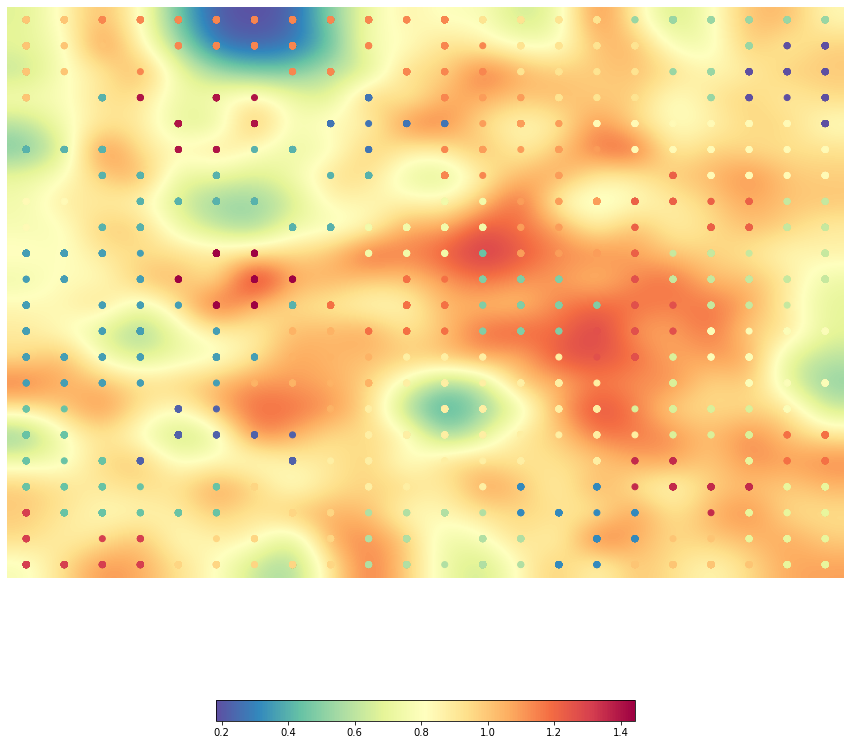

clusters
[[19 19 22 22 22 22 22 22 22 22 22 22 17 17 17 17  8  8  8  8  8  8]
 [19 19 19 22 22 22 22 22 22 22 22 22 22 17 17 17 17  8  8  8  0  0]
 [19 19 19 22 22 22 22 22 22 22 22 22 22 17 17 17 17  8  8  0  0  0]
 [19 19  5 28 28 28 28 22 22  2 22 22 21 21 17 17 17 15  8  0  0  0]
 [ 5  5  5 28 28 28 28  2  2  2  2  2 21 21 21 15 15 15 15 15 15  0]
 [ 5  5  5  5 28 28  5  5  2  2  2 22 21 21 21 21 15 15 15 15 15 15]
 [ 5  5  5  5  5  5  5  5  5  5 22 22 22 21 21 21 24 24 15 15 15 15]
 [15 15  5  5  5  5  5  5  5  5 13 13 13 21 21 21 24 24 24 24 10 10]
 [15  4  5  5  5  5  5  5  5 13 13 13 13 21 21 21 24 24 24 24 10 10]
 [ 4  4  4  4 29 29 29  5  5 13 13 13  6 21 21 21 24 10 10 10 10 10]
 [ 4  4  4  4 29 29 29 29 23 23 23 23  7  7  7 21 25 10 10 10 10 10]
 [ 4  4  4  4  4 29 29  5 23 23 23 23  7  7  7  7 25 25 10 10 10 10]
 [ 4  4  4  4  4  4 29 20 20 23 23 23  7  7  7 25 25 25 14 14 14 14]
 [ 4  4  4  4  4  4  4 20 20 20 16 16 16 16 16 25 25 11 14 14 14 14]
 [ 4  4  4  4 28  4 20 20

In [ ]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

#Clusters
clusters = som.clusters
print("clusters")
print(clusters, "\n")

unique_clusters, number_of_neurons_in_each_cluster = np.unique(clusters,return_counts=True)
indices_of_number_of_neurons = np.argsort(number_of_neurons_in_each_cluster)
number_of_neurons_in_each_cluster = np.sort(number_of_neurons_in_each_cluster)
print("Clusters sorted by increasing number of neurons: \nCluster index \nNumber of neurons")
print(indices_of_number_of_neurons)
print(number_of_neurons_in_each_cluster)

In [ ]:
def print_categories_stats(movies): #movies is a list of movie-ID’s
    cluster_categories = []
    for i in movies:
        temp = categories[i][0].split(",")
        #categories[ID] is list with 1 string inside. temp is list of strings
        for c in temp:
            c = c.strip()
            cluster_categories.append(c)
        
    u_cluster_categories, counts = np.unique(cluster_categories, return_counts=True)
    ar = list(zip(u_cluster_categories, counts))
    sorted_ar = sorted(ar, key=lambda tup: tup[1], reverse=True)
    print("Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster")
    print(sorted_ar)

    
def neuron_movies_report(neurons):  #neurons is a list of bmus(neurons)-indexes 
    movies = []
    #find movies in these neurons (through indices)
    for i in indices: 
        if i in neurons: #if this neuron is in the given ones (bmus)
            movies.append(indices.index(i)) #append the movie-ID
    print_categories_stats(movies)

    
def print_cluster_neurons_movies_report(cluster): #cluster is the ID of a cluster
    neuron_indices = []
    bmus_indices = []
    #find the neurons that are in the cluster
    for i in range(len(clusters)):
        for j in range(len(clusters[0])):
            if clusters[i][j] == cluster:
                neuron_indices.append(n_columns*i + j) #append the index of the neuron
    print("Cluster ID: ", cluster)
    print("Αριθμός νευρώνων στο cluster : ", len(neuron_indices))
    #to check if neuron is in ubmus
    for neuron in neuron_indices: 
        if neuron in ubmus_indices: 
            bmus_indices.append(neuron)
    neuron_movies_report(bmus_indices)

In [ ]:
indices = list(indices)
for i in range(k):
    print_cluster_neurons_movies_report(i)
    print()

Cluster ID:  0
Αριθμός νευρώνων στο cluster :  9
Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Drama"', 156), ('"Horror"', 92), ('"Historical drama"', 40), ('"Comedy film"', 32), ('"Thriller"', 18), ('"World cinema"', 18), ('"Chinese Movies"', 17), ('"Crime Fiction"', 12), ('"Detective fiction"', 12), ('"Detective"', 12), ('"Black-and-white"', 7), ('"Psychological thriller"', 7), ('"Fantasy"', 5)]

Cluster ID:  1
Αριθμός νευρώνων στο cluster :  14
Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Comedy"', 140), ('"Family Film"', 108), ('"Action"', 44), ('"Adventure"', 37), ('"Spy"', 37), ('"Animation"', 35), ('"Short Film"', 32), ('"Parody"', 27), ('"Action/Adventure"', 23), ('"Comedy of Errors"', 21), ('"Domestic Comedy"', 21), ('"Satire"', 21), ('"Children\'s/Family"', 20), ('"Science Fiction"', 14), ('"Swashbuckler films"', 14), ('"Sports"', 12), ('"Black-and-white"', 8), ('"Family-Oriented Adventure"', 8), ('"Fantasy Adventure"', 7), ('"Fantasy Come

# Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM
---

In [ ]:
# εκτύπωση συχνοτήτων κατηγοριών

movie_array = [i for i in range(5000)]

print(print_categories_stats(movie_array))

Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Drama"', 2255), ('"Comedy"', 1220), ('"Thriller"', 825), ('"Romance Film"', 800), ('"Action"', 715), ('"World cinema"', 616), ('"Crime Fiction"', 504), ('"Horror"', 494), ('"Adventure"', 430), ('"Action/Adventure"', 429), ('"Indie"', 425), ('"Black-and-white"', 417), ('"Family Film"', 402), ('"Short Film"', 399), ('"Musical"', 318), ('"Romantic drama"', 310), ('"Animation"', 298), ('"Science Fiction"', 296), ('"Mystery"', 284), ('"Fantasy"', 240), ('"Comedy film"', 221), ('"Romantic comedy"', 219), ('"Crime Thriller"', 202), ('"War film"', 191), ('"Japanese Movies"', 153), ('"Psychological thriller"', 151), ('"Period piece"', 149), ('"Documentary"', 147), ('"Film adaptation"', 147), ('"Bollywood"', 133), ('"Comedy-drama"', 132), ('"Western"', 132), ('"Silent film"', 120), ('"Chinese Movies"', 113), ('"Children\'s/Family"', 105), ('"Family Drama"', 104), ('"Television movie"', 97), ('"Black comedy"', 94), ('"Martial Arts Fi

Για τον τελικό χάρτη που παράγουμε συμπεραίνουμε τα εξής:

1. Από τα πιο πάνω αποτελέσματα που αφορούν τη συχνότητα των κατηγοριών στις ταινίες, παρατηρούμε ότι υπάρχουν πολύ συχνές, λιγότερο συχνές και πολύ σπάνιες κατηγορίες. Για παράδειγμα, πολλές από τις ταινίες έχουν την κατηγορία "Drama" και "Comedy"(για αυτό και αυτές οι κατηγορίες βρίσκονται σε πολλούς νευρώνες), αλλά πολύ λιγότερες είναι οι ταινίες με κατηγορία "black and white" και "Indie", γεγονός που τις καθιστά δύσκολο να εντοπιστούν, όχι μόνο γιατι είναι λίγες, αλλά και επειδή είναι δύσκολο από την περιγραφή μιας ταινίας να εξάγεις αυτό το είδος. Για παράδειγμα, το indie υποδηλώνει οτι η ταινία είναι ανεξάρτητης παραγωγής, άρα αν δε δηλώνεται  ρητά στη περίληψη της ταινίας, δεν μπορεί να εννοειθεί από τις λέξεις. Επίσης, ακόμη και να υπήρχε ρητά στη περίληψη, τέτοιες λέξεις επειδή θα ήταν πολύ σπάνιες, το πιο πιθανόν ότι θα κόβονταν από τη ελάχιστη συχνότητα παρατηρήσεων του TfidfVectorizer.

2. Παρατηρούμε ότι πρότυπα εισόδου που είναι σημασιολογικά μακρινά μεταξύ τους, για παράδειγμα ταινία κατηγορίας Horror και ταινία κατηγορίας Family Movie εμφανίζονται σε κόκκινα σημεία στο χάρτη με την έννοια ότι έχουν μεγάλη απόσταση μεταξύ τους. Συγκεκριμένα στο δικό μας χάρτη για τα Cluster 22 και 13 που βρίσκονται δίπλα δίπλα αλλά μέσα σε κόκκινη περιοχή ανήκουν σε αρκετά διαφορετικές κατηγορίες. Το 22 ανήκει στη κατηγορία Horror, ενώ το 13 στη κατηγορία Comedy.

3. Παρατηρούμε ότι πρότυπα εισόδου που είναι σημασιολογικά κοντά μεταξύ τους, για παράδειγμα τανίες Romance και Comedy εμφανίζονται σε μπλε σημεία στο χάρτη, αφού έχουν μικρή απόσταση μεταξύ τους. Για παράδειγμα στο δικό μας χάρτη τα Cluster 5 και 15 βρίσκονται δίπλα δίπλα σε μπλέ-πράσινες περιοχές και ανήκουν σε πολύ ομοιες κατηγορίες. Το 5 ανήκει στις κατηγορίες Comedy, Romance και το 15 ανήκει στις ίδιες κατηγορίες, απλά υπάρχουν μικρές διαφορές που ξεχωρίζουν τα δύο clusters. Οι παρατηρήσεις έγιναν αρχικά από τον πίνακα clusters που εμφανίζεται μαζί με το χάρτη και στη συνέχεια επιβεβαιώσαμε την ομοιότητα από τα αποτελέσματα της συνάρτησης print_cluster_neurons_movies_report.

Μερικά clusters που δεν έχουν σαφή χαρακτηριστικά είναι:

1.  Cluster ID:  19 <br>
Αριθμός νευρώνων στο cluster :  16 <br>
Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster <br>
[('"Short Film"', 110), ('"Animation"', 104), ('"Horror"', 92), ('"Family Film"', 44), ('"Comedy film"', 26), ('"Thriller"', 18), ('"World cinema"', 18), ('"Chinese Movies"', 12), ('"Crime Fiction"', 12), ('"Detective fiction"', 12), ('"Detective"', 12), ('"Black-and-white"', 7), ('"Psychological thriller"', 7), ('"Zombie Film"', 5), ('"Adventure"', 3), ('"Children\'s/Family"', 3)]

2.  Cluster ID:  10 <br>
Αριθμός νευρώνων στο cluster :  18 <br>
Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster <br>
[('"Drama"', 92), ('"Black-and-white"', 53), ('"War film"', 52), ('"Indie"', 35), ('"Silent film"', 31), ('"Adventure"', 30), ('"Action"', 29), ('"Romance Film"', 17), ('"Comedy"', 12), ('"Spy"', 9), ('"Period piece"', 8), ('"Action/Adventure"', 6), ('"Biopic [feature]"', 5), ('"Costume Adventure"', 5), ('"Costume drama"', 5), ('"Docudrama"', 5), ('"Historical fiction"', 5), ('"World cinema"', 5), ('"Romantic drama"', 4), ('"Film adaptation"', 3), ('"Historical drama"', 3), ('"Science Fiction"', 3), ('"Superhero movie"', 3), ('"Television movie"', 3), ('"Biographical film"', 2), ('"Biography"', 2), ('"Foreign legion"', 1), ('"Japanese Movies"', 1)]

3. Cluster ID:  22 <br>
Αριθμός νευρώνων στο cluster :  38 <br>
Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster <br>
[('"Drama"', 224), ('"Horror"', 193), ('"Thriller"', 152), ('"Romance Film"', 111), ('"Short Film"', 106), ('"Documentary"', 105), ('"Romantic drama"', 81), ('"Slasher"', 69), ('"Comedy film"', 62), ('"World cinema"', 60), ('"Science Fiction"', 59), ('"Music"', 52), ('"Indie"', 51), ('"Action"', 36), ('"Comedy"', 36), ('"Musical"', 36), ('"Adventure"', 34), ('"Crime Fiction"', 31), ('"Bollywood"', 29), ('"B-movie"', 28), ('"Romantic comedy"', 28), ('"Sci-Fi Horror"', 25), ('"Cult"', 23), ('"Fantasy"', 22), ('"Mystery"', 22), ('"Creature Film"', 19), ('"Black comedy"', 18), ('"Teen"', 18), ('"Biography"', 17), ('"Extreme Sports"', 17), ('"Fantasy Adventure"', 17), ('"Period piece"', 17), ('"Sports"', 17), ('"Sword and sorcery films"', 17), ('"Travel"', 17), ('"Family Film"', 13), ('"Japanese Movies"', 13), ('"Television movie"', 13), ('"Zombie Film"', 13), ('"Western"', 11), ('"Musical Drama"', 10), ('"Backstage Musical"', 9), ('"Crime Drama"', 7), ('"Gangster Film"', 7), ('"Natural horror films"', 6), ('"Action/Adventure"', 1), ('"Animation"', 1), ('"Childhood Drama"', 1), ('"Disaster"', 1), ('"Doomsday film"', 1), ('"Parody"', 1), ('"Psychological thriller"', 1), ('"Romantic fantasy"', 1), ('"Satire"', 1)] <br>
To τελευταίο είναι ένα πολύ μεγάλο cluster και δεν μπορεί να βγει ξεκάθαρα το ποιες κατηγορίες αντιπροσωπεύει. <br>

Στο χάρτη μας υπάρχουν και clusters συγκεκριμένων ειδών που δεν έχουν τοπολογική συνάφεια με γύρω περιοχές. Ένα παράδειγμα έιναι τα cluster 0 και 8 τα οποία ενώ βρίσκονται δίπλα δίπλα εντός πράσινης περιοχής δεν είναι κοντά σημασιολογικά. Το ένα είναι Horror(0) ενώ το άλλος έιναι Romance(8). Ο λόγος που ίσως συμβαίνει αυτό οφείλεται στον τρόπο με τον οποίο γίνεται η ομαδοποίηση: βασιζόμαστε τόσο στο catbins, όσο και στα corpus τα οποία όχι μόνο έχουμε περικόψει αρκετά κατά το tfidf, αλλά επηρεάζονται δραματικά  λόγω ανεπαρκούς και σωστού τρόπου μετατροπής τους σε διάνυσμα για να μπορούμε να τα επεξεργαστούμε(π.χ κάθε λέξη που περιλαβάνεται σε ένα κείμενο έχει την ίδια βαρύτητα με όλες τις άλλες, αυτό δεν φέρνει πάντα σωστά αποτελέσματα αφού με το να έχουμε την λέξη Christmas καταλαβαίνουμε ότι πρόκειται για Holiday Movie ενώ με το να έχουμε τη λέξη cat, ή ονόματα πρωταγωνιστών κοινά δεν καταλήγουμε σε κάποιο συμπέρασμα όσο αφορά το είδος). Επομένως, τα γειτονικά clusters μπορεί να είναι όντως κοντινά ως προς τις αποστάσεις των πινάκων λέξεων(corpus και κατηγοριών), απλά οι αντίστοιχες ταινίες δεν ανήκουν σε παρόμοιες κατηγορίες στη πραγματικότητα. <br>

Παρατηρούμε ότι έχουμε clusters πολλών ειδών, άλλα με πιο πολλούς νευρώνες και άλλα με λιγότερους. Εν τούτοις, στις περισσότερες περιπτώσεις οι ετικέτες των ταινιών έχουν εννοιολογική συνάφεια (ενδιαφέρον). Παρακάτω παρατίθενται παραδειγματα από ομάδες που έχουν συνάφεια:

1. Cluster ID: 3 <br>
   **Κατηγορία: Thriller, Horror**  <br>
Αριθμός νευρώνων στο cluster :  12 <br>
Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster <br>
[('"Thriller"', 56), ('"Mystery"', 40), ('"Psychological thriller"', 40), ('"Suspense"', 40), ('"Horror"', 24), ('"Supernatural"', 24), ('"Television movie"', 24), ('"Crime Thriller"', 16), ('"Erotic thriller"', 16)]

2. Cluster ID:  18 <br> 
   **Κατηγορία: Adventure, Family Film**  <br>
Αριθμός νευρώνων στο cluster :  14 <br>
Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster <br>
[('"Adventure"', 53), ('"Family Film"', 53), ('"Children\'s Fantasy"', 49), ('"Children\'s/Family"', 49), ('"Fantasy"', 42), ('"Drama"', 40), ('"Animation"', 26), ('"Coming of age"', 26), ('"Costume drama"', 26), ('"Historical fiction"', 26), ('"Mythological Fantasy"', 26), ('"Sword and sorcery films"', 26), ('"Sword and sorcery"', 26), ('"Fantasy Adventure"', 14), ('"Indie"', 14), ('"Children\'s"', 7), ('"Family-Oriented Adventure"', 7), ('"Comedy"', 2), ('"Fantasy Comedy"', 2)]

3. Cluster ID:  26 <br>
  **Κατηγορία: Action, Thriller**  <br>
Αριθμός νευρώνων στο cluster :  9 <br>
Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster <br>
[('"Action Thrillers"', 32), ('"Action"', 32), ('"Action/Adventure"', 32), ('"Glamorized Spy Film"', 32), ('"Spy"', 32), ('"Thriller"', 32)]

4. Cluster ID:  9 <br>
  **Κατηγορία: Crime, Courtroom Drama**  <br>
Αριθμός νευρώνων στο cluster :  15 <br>
Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster <br>
[('"Courtroom Drama"', 26), ('"Crime Fiction"', 26), ('"Crime Thriller"', 26), ('"Drama"', 26), ('"Film adaptation"', 26), ('"Mystery"', 26), ('"Suspense"', 26), ('"Thriller"', 26)]

